# MXNet Numpy
Briefly describe what are we going to talk about


In [1]:
# a bit of setup

import matplotlib.pyplot as plt

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
import numpy as np
import numpy.random as random
import time
from util import get_data, plot_data

# Initialize data and weight

data, label = get_data()
num_samples = data.shape[0]
num_features = data.shape[1]
num_classes = label.shape[1]

weight = random.randn(num_features, num_classes)

print 'Shapes: data {}, label {}, w {}'.format(data.shape, label.shape, weight.shape)
print '# samples: {}'.format(num_samples)
print '# features: {}'.format(num_features)
print '# classes: {}'.format(num_classes)

Shapes: data (10000, 500), label (10000, 5), w (500, 5)
# samples: 10000
# features: 500
# classes: 5


## Logistic regression using Numpy

In [3]:
# predict the class using logistic regression
def predict(w, x):
    a = np.exp(np.dot(x, w))
    a_sum = np.sum(a, axis=1, keepdims=True)
    prob = a / a_sum
    return prob

Ground truth


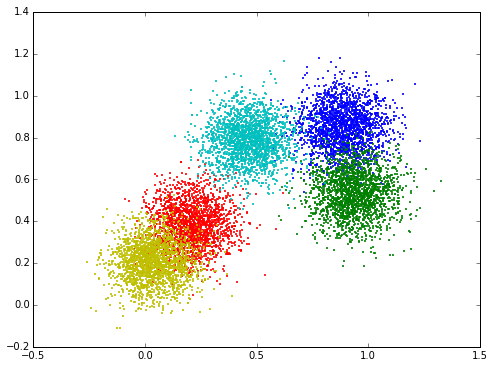

In [4]:
# Visualize what the ground truth data looks like
print 'Ground truth'
plot_data(data, label)

Initial Guess


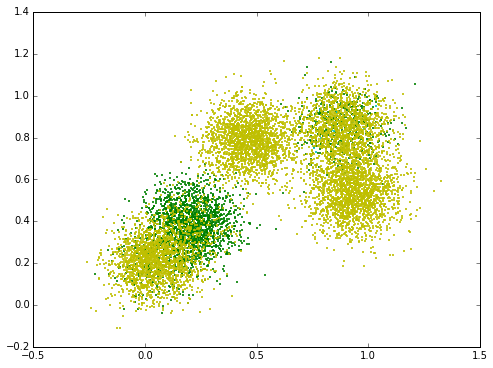

In [ ]:
# Visualize the initial guess
print 'Initial Guess'
plot_data(data, predict(weight, data))

In [ ]:
# Using gradient descent to fit the correct classes
def train(w, x, loops):
    for i in range(loops):
        prob = predict(w, x)
        if i % 10 == 0:
            print 'Iter {}, training loss {}'.format(i, -np.sum(np.log(prob) * label) / num_samples)
        # calculate gradient of weight
        dy = prob - label
        dw = np.dot(data.T, dy) / num_samples
        w -= 0.1 * dw

# Now training it for 100 iterations
start_time = time.time()
train(weight, data, 100)
print 'Training time: {}s'.format(time.time() - start_time)

Iter 0, training loss 20.5619452439
Iter 10, training loss 2.27793032424


In [ ]:
# Plot the prediction after training. It should show similar image as the ground truth.
plot_data(data, predict(weight, data))

## Logistic regression using MXNet Numpy

### Utilize GPU computation with little (or no) numpy syntax change

In [ ]:
import minpy.numpy as np
import minpy.numpy.random as random

In [ ]:
# Initialize weight matrix (again)
weight = random.randn(num_features, num_classes)

# Now training it for 100 iterations
start_time = time.time()
train(weight, data, 100)
print 'Training time: {}s'.format(time.time() - start_time)

### Automatic gradient calculation

In [ ]:
from minpy.core import grad

# Initialize weight matrix (again)
weight = random.randn(num_features, num_classes)

# Using gradient descent to fit the correct classes
def train_loss(w, x):
    prob = predict(w, x)
    return -np.sum(np.log(prob) * label) / num_samples

# Calculate gradient function automatically
grad_function = grad(train_loss)

# Now training it for 100 iterations
start_time = time.time()
for i in range(100):
    dw = grad_function(weight, data)
    weight -= 0.1 * dw
print 'Training time: {}s'.format(time.time() - start_time)